In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdf_boa2018 = gpd.read_file('./data/BOA/CC_2018.DBF')
gdf_boa2019 = gpd.read_file('./data/BOA/CC_2019.DBF')
gdf_boa2020 = gpd.read_file('./data/BOA/CC_2020.DBF')
gdf_boa2021 = gpd.read_file('./data/BOA/CC_2021.DBF')
gdf_boa2022 = gpd.read_file('./data/BOA/CC_2022.DBF')
df_income = pd.read_csv('./data/processed/income_level_neighbourhood_of_Gemeente_Breda_processed.csv')
df_education = pd.read_csv('./data/processed/educational_level_neighbourhood_of_Gemeente_Breda_processed.csv')
df_population = pd.read_csv('./data/processed/Population_of_neighbourhood_of_Gemeente_Breda_processed.csv')
df_qol = pd.read_csv('./data/processed/QOL_of_Gemeente_Breda_processed.csv')

del df_income['Unnamed: 0']
del df_education['Unnamed: 0']
del df_population['Unnamed: 0']
del df_qol['Unnamed: 0']

In [3]:
df_income['value'] = df_income['value'].str.replace(',0','')
df_income['value'] = df_income['value'].str.replace('?','0')
df_income['value'] = df_income['value'].astype('float')

df_education['value'] = df_education['value'].str.replace(',','.')
df_education['value'] = df_education['value'].str.replace('?','0')
df_education['value'] = df_education['value'].astype('float')

df_qol['value'] = df_qol['value'].str.replace(',','.')
df_qol['value'] = df_qol['value'].str.replace('?','0')
df_qol['value'] = df_qol['value'].astype('float')

df_qol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buurten  168 non-null    object 
 1   Year     168 non-null    int64  
 2   value    166 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [4]:
gdf_boa2022['Soort'].unique()

array(['Afval', 'Zwervers', 'Jeugd', 'Parkeeroverlast', 'Drugs/alcohol',
       'Fietsoverlast', 'Wildplassen'], dtype=object)

In [5]:
gdf_boa = pd.concat([gdf_boa2018, gdf_boa2019, gdf_boa2020, gdf_boa2021, gdf_boa2022])

In [6]:
gdf_boa.columns

Index(['Jaar', 'CBS_code', 'Soort', 'Count', 'geometry'], dtype='object')

In [7]:
gdf_boa['Jaar'].unique()

array([2018., 2019., 2020., 2021., 2022.])

In [8]:
gdf_boa['Jaar'] = gdf_boa['Jaar'].astype('int')

In [9]:
gdf_boa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 16254 entries, 0 to 5147
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Jaar      16254 non-null  int64   
 1   CBS_code  16254 non-null  object  
 2   Soort     16254 non-null  object  
 3   Count     16254 non-null  int64   
 4   geometry  16254 non-null  geometry
dtypes: geometry(1), int64(2), object(2)
memory usage: 761.9+ KB


In [10]:
gdf_boa.head(10)

,Jaar,CBS_code,Soort,Count,geometry
0,2018,E1122N4008,Fietsoverlast,1,"POLYGON ((4.76951 51.59537, 4.77095 51.59538, ..."
1,2018,E1158N3996,Parkeeroverlast,3,"POLYGON ((4.82160 51.58485, 4.82304 51.58485, ..."
2,2018,E1127N4005,Wildplassen,1,"POLYGON ((4.77676 51.59271, 4.77821 51.59272, ..."
3,2018,E1118N4005,Wildplassen,1,"POLYGON ((4.76378 51.59264, 4.76522 51.59265, ..."
4,2018,E1168N4004,Parkeeroverlast,1,"POLYGON ((4.83594 51.59211, 4.83738 51.59211, ..."
5,2018,E1132N4011,Fietsoverlast,192,"POLYGON ((4.78391 51.59814, 4.78535 51.59815, ..."
6,2018,E1136N4022,Fietsoverlast,5,"POLYGON ((4.78955 51.60806, 4.79099 51.60807, ..."
7,2018,E1103N4029,Parkeeroverlast,1,"POLYGON ((4.74182 51.61410, 4.74327 51.61410, ..."
8,2018,E1141N3998,Fietsoverlast,1,"POLYGON ((4.79705 51.58652, 4.79849 51.58653, ..."
9,2018,E1093N3979,Afval,1,"POLYGON ((4.72804 51.56908, 4.72948 51.56908, ..."


In [11]:
gdf_boa = gdf_boa.groupby(['Jaar', 'Soort'], as_index=False)['Count'].sum()
df_income = df_income.groupby(['Year','level_of_income'], as_index=False)['value'].sum()
df_education = df_education.groupby(['Year','level_of_education'], as_index=False)['value'].sum()
df_population_age = df_population.groupby(['Year','Age'], as_index=False)['value'].sum()
df_population_gender = df_population.groupby(['Year','Gender'], as_index=False)['value'].sum()
df_qol = df_qol.groupby('Year', as_index=False)['value'].mean()
gdf_boa

,Jaar,Soort,Count
0,2018,Afval,1495
1,2018,Drugs/alcohol,81
2,2018,Fietsoverlast,13674
3,2018,Jeugd,577
4,2018,Parkeeroverlast,5115
5,2018,Wildplassen,58
6,2018,Zwervers,70
7,2019,Afval,526
8,2019,Drugs/alcohol,150
9,2019,Fietsoverlast,14131


In [12]:
'''
crimes = gdf_boa['Soort'].unique()
years = gdf_boa['Jaar'].unique()

for crime in crimes:
    for year in years:
        
        crime_data = gdf_boa.loc[gdf_boa['Soort'] == crime]
        crime_data_year = crime_data.loc[crime_data['Jaar'] == year]

        ax = crime_data_year.plot('Count')

        ax.set_title(f'{crime} in {year}')

        ax.legend([crime])

        plt.show()
'''

"\ncrimes = gdf_boa['Soort'].unique()\nyears = gdf_boa['Jaar'].unique()\n\nfor crime in crimes:\n    for year in years:\n        \n        crime_data = gdf_boa.loc[gdf_boa['Soort'] == crime]\n        crime_data_year = crime_data.loc[crime_data['Jaar'] == year]\n\n        ax = crime_data_year.plot('Count')\n\n        ax.set_title(f'{crime} in {year}')\n\n        ax.legend([crime])\n\n        plt.show()\n"

<Axes: xlabel='Jaar', ylabel='Count'>

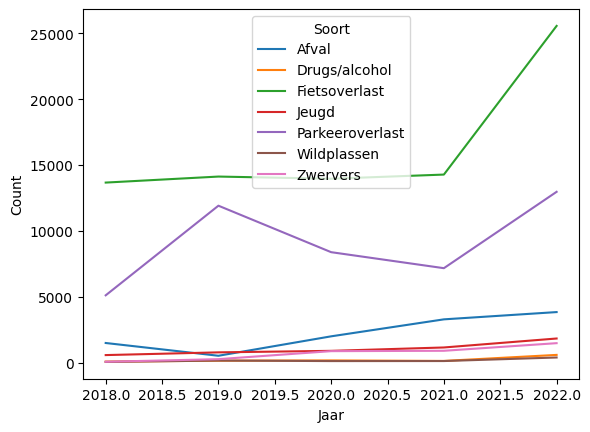

In [13]:
sns.lineplot(data=gdf_boa,x='Jaar', y='Count', hue='Soort')


<Axes: xlabel='Year', ylabel='value'>

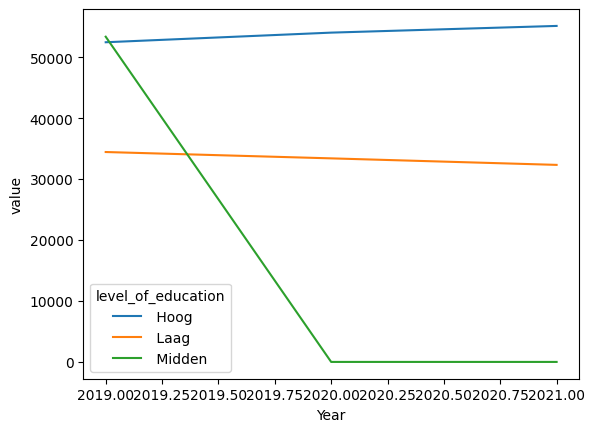

In [14]:
sns.lineplot(data=df_education, x='Year', y='value', hue='level_of_education')

<Axes: xlabel='Year', ylabel='value'>

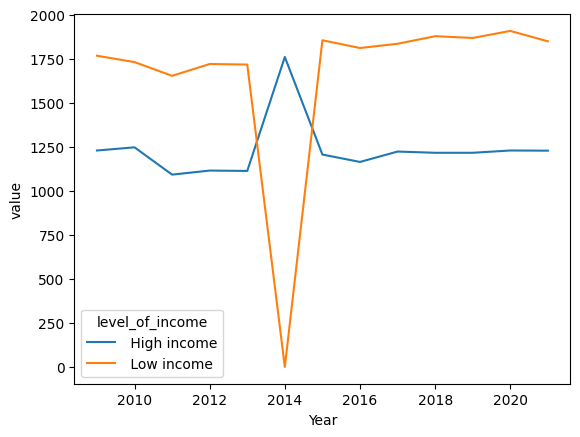

In [15]:
sns.lineplot(data=df_income, x='Year', y='value', hue='level_of_income')

<Axes: xlabel='Year', ylabel='value'>

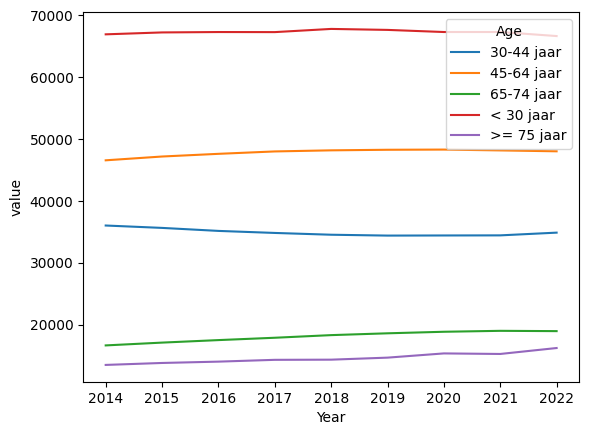

In [16]:
sns.lineplot(data=df_population_age, x='Year', y='value', hue='Age')

<Axes: xlabel='Year', ylabel='value'>

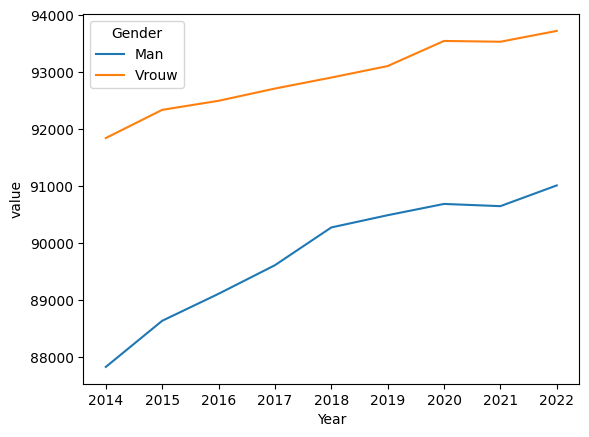

In [17]:
sns.lineplot(data=df_population_gender, x='Year', y='value', hue='Gender')

<Axes: xlabel='Year', ylabel='value'>

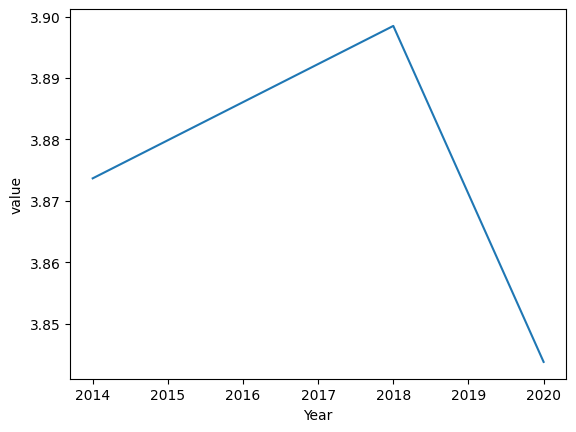

In [18]:
sns.lineplot(data=df_qol, x='Year', y='value')